In [4]:
import pandas as pd
import matplotlib.pyplot as plt
import os

  pdDistrict  modis_2013_Portugal.csv
0      Norte                     2240
1     Centro                     1351
2      Other                      594
3   Alentejo                      198
4  Lisboa VT                       42
5    Algarve                       13
  pdDistrict  modis_2014_Portugal.csv
0      Norte                      260
1     Centro                      153
2      Other                       96
3   Alentejo                       68
4  Lisboa VT                       24
5    Algarve                       13
  pdDistrict  modis_2015_Portugal.csv
0      Norte                      863
1     Centro                      514
2      Other                      463
3   Alentejo                      134
4  Lisboa VT                       72
5    Algarve                       12
  pdDistrict  modis_2016_Portugal.csv
0      Norte                     1897
1     Centro                     1706
2      Other                     1049
3   Alentejo                      103
4  Lisboa VT

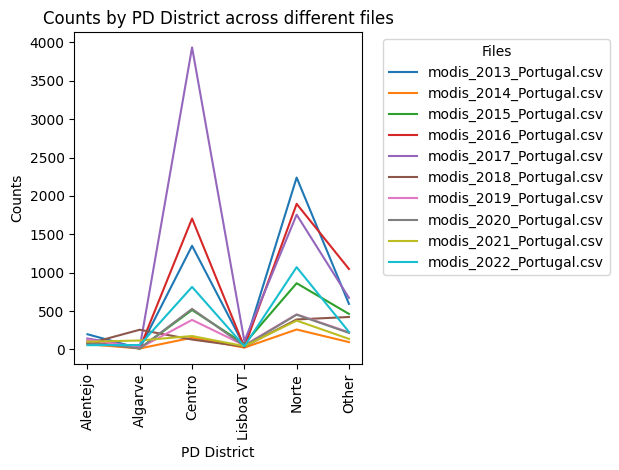

In [10]:
# 假设所有CSV文件都在'your_folder_path'文件夹中
folder_path = 'C:/all files/aba/portuglal/sheets from 2013-2022'
files = os.listdir(folder_path)

# 创建一个空的DataFrame来累计每个文件的pdDistrict计数
district_counts = pd.DataFrame()

for file in files:
    if file.endswith('.csv'):
        # 加载CSV文件
        df = pd.read_csv(os.path.join(folder_path, file))
        # 计算pdDistrict的计数并转换为DataFrame
        counts = df['pdDistrict'].value_counts().rename_axis('pdDistrict').reset_index(name=file)
        print(counts)
        # 按pdDistrict合并到district_counts DataFrame中
        if district_counts.empty:
            district_counts = counts
        else:
            district_counts = district_counts.merge(counts, on='pdDistrict', how='outer')

# 替换NaN为0，因为有些pdDistrict项可能不在所有文件中出现
district_counts.fillna(0, inplace=True)

# 设置索引为pdDistrict，便于绘图
district_counts.set_index('pdDistrict', inplace=True)

# 绘制曲线图
district_counts.plot(kind='line')
plt.xlabel('PD District')
plt.ylabel('Counts')
plt.title('Counts by PD District across different files')
plt.legend(title='Files', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.xticks(rotation=90)  # 旋转x轴标签，以防止它们重叠
plt.tight_layout()  # 调整布局以适应标签
plt.show()

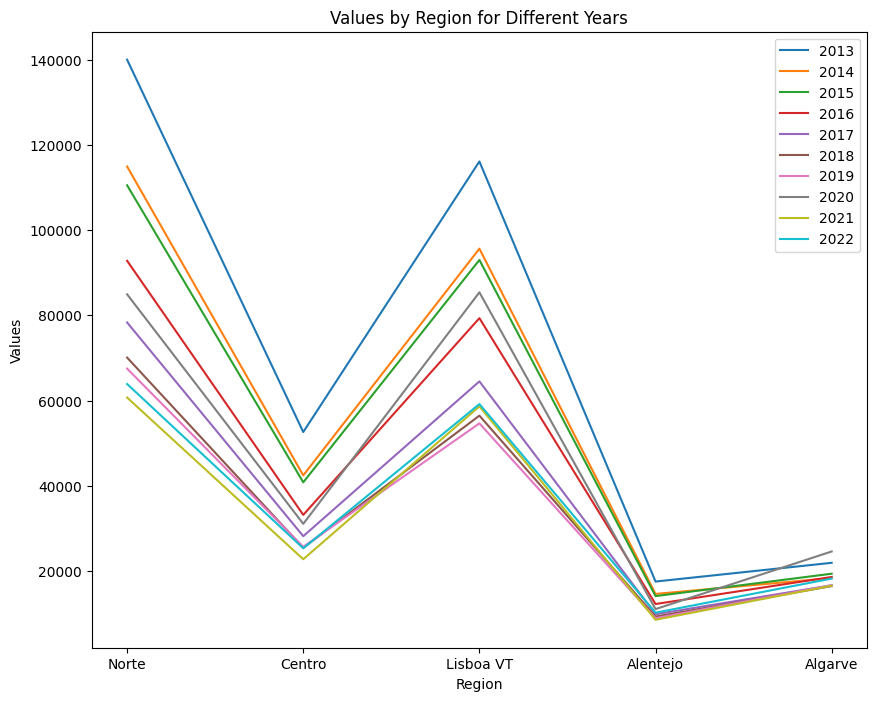

In [9]:
import pandas as pd
import matplotlib.pyplot as plt

# 确保文件路径是正确的，去掉了额外的引号
file_path = "C:/all files/aba/portuglal/unemployment dat/summarized sheet from 13 to 22.xlsx"

# 用Pandas读取Excel文件
df = pd.read_excel(file_path, sheet_name=0)

# 设置图的大小
plt.figure(figsize=(10, 8))

# 对于Excel中的每个年份，绘制一个曲线图
for index, row in df.iterrows():
    # 确保年份是整数或字符串，这样标签才能正确显示
    plt.plot(df.columns[1:], row[1:], label=str(row['Year']))

# 添加图例
plt.legend()

# 设置横轴和纵轴的标签
plt.xlabel('Region')
plt.ylabel('Values')

# 设置图表的标题
plt.title('Values by Region for Different Years')

# 显示图表
plt.show()


In [11]:
# 载入数据
fires = pd.read_excel("C:/all files/aba/portuglal/fire summarization.xlsx")  # 假设'fires.xlsx'是火灾数据文件
unemployment = pd.read_excel("C:/all files/aba/portuglal/unemployment dat/summarized sheet from 13 to 22.xlsx")  # 假设'unemployment.xlsx'是失业数据文件

# 确保你的数据表行顺序和标识相匹配
print(fires.head())
print(unemployment.head())

# 按行合并数据
merged_data = pd.concat([fires, unemployment], axis=1)

# 如果有重复的列（比如两个数据表都有'Year'和'Area'列），可以选择删除一个
# merged_data = merged_data.loc[:,~merged_data.columns.duplicated()]

# 查看合并后的数据
print(merged_data.head())

   Year  Norte  Centro  Lisboa VT  Alentejo  Algarve
0  2013   2240    1351         42       198       13
1  2014    260     153         24        68       13
2  2015    863     514         72       134       12
3  2016   1897    1706         30       103       16
4  2017   1756    3936        110       143       27
   Year   Norte  Centro  Lisboa VT  Alentejo  Algarve
0  2013  140021   52615     116138     17516    21910
1  2014  114943   42439      95665     14605    18342
2  2015  110541   40808      93013     14097    19354
3  2016   92814   33162      79344     12236    18585
4  2017   78330   28161      64506      9839    16638
   Year  Norte  Centro  Lisboa VT  Alentejo  Algarve  Year   Norte  Centro  \
0  2013   2240    1351         42       198       13  2013  140021   52615   
1  2014    260     153         24        68       13  2014  114943   42439   
2  2015    863     514         72       134       12  2015  110541   40808   
3  2016   1897    1706         30       103   

In [12]:
import pandas as pd

# 载入数据
fires = pd.read_excel("C:/all files/aba/portuglal/fire summarization.xlsx")  # 假设'fires.xlsx'是火灾数据文件
unemployment = pd.read_excel("C:/all files/aba/portuglal/unemployment dat/summarized sheet from 13 to 22.xlsx")  # 假设'unemployment.xlsx'是失业数据文件

# 确保你的数据表行顺序和标识相匹配
print(fires.head())
print(unemployment.head())

# 按行合并数据
merged_data = pd.concat([fires, unemployment], axis=1)

# 如果有重复的列（比如两个数据表都有'Year'和'Area'列），可以选择删除一个
merged_data = merged_data.loc[:,~merged_data.columns.duplicated()]

# 查看合并后的数据
print(merged_data.head())

# 保存合并后的数据到新的Excel文件
merged_data.to_excel("C:/all files/aba/portuglal/merged_data.xlsx", index=False)




   Year  Norte-f  Centro-f  Lisboa VT-f  Alentejo-f  Algarve-f
0  2013     2240      1351           42         198         13
1  2014      260       153           24          68         13
2  2015      863       514           72         134         12
3  2016     1897      1706           30         103         16
4  2017     1756      3936          110         143         27
   Year   Norte  Centro  Lisboa VT  Alentejo  Algarve
0  2013  140021   52615     116138     17516    21910
1  2014  114943   42439      95665     14605    18342
2  2015  110541   40808      93013     14097    19354
3  2016   92814   33162      79344     12236    18585
4  2017   78330   28161      64506      9839    16638
   Year  Norte-f  Centro-f  Lisboa VT-f  Alentejo-f  Algarve-f   Norte  \
0  2013     2240      1351           42         198         13  140021   
1  2014      260       153           24          68         13  114943   
2  2015      863       514           72         134         12  110541   
3 

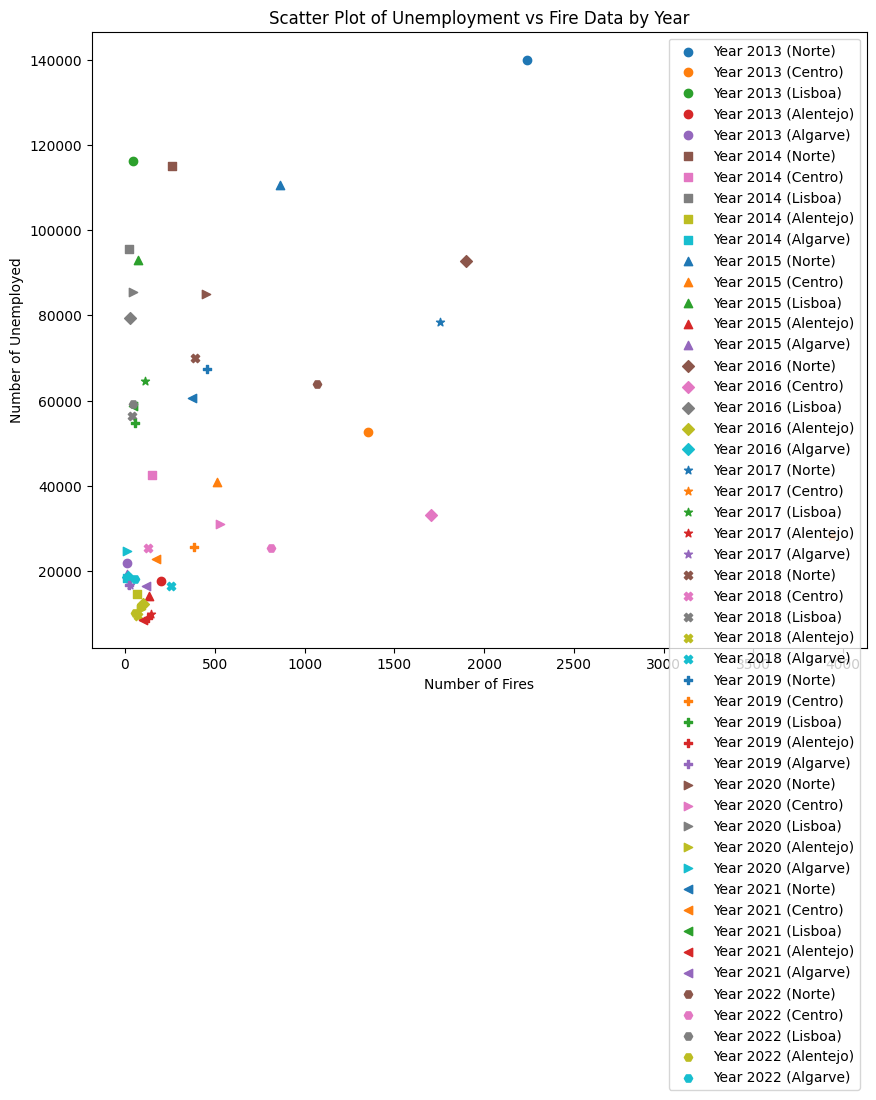

In [6]:
import pandas as pd
import matplotlib.pyplot as plt

# 读取Excel文件
df = pd.read_excel("C:/all files/aba/portuglal/merged_data.xlsx")
                   # 定义年份对应的形状
markers = ['o', 's', '^', 'D', '*', 'X', 'P', '>', '<', 'H']  # 这是10个不同的形状

# 为每个地区绘制散点图
plt.figure(figsize=(10, 8))

for i in range(len(df['Year'])):
    year = df['Year'][i]
    # 假设 'fire1', 'unemployment1', 'fire2', 'unemployment2' ... 是列名
    plt.scatter(df['Norte-f'][i], df['Norte-u'][i], marker=markers[i % len(markers)], label=f'Year {year} (Norte)')
    plt.scatter(df['Centro-f'][i], df['Centro-u'][i], marker=markers[i % len(markers)], label=f'Year {year} (Centro)')
    plt.scatter(df['Lisboa VT-f'][i], df['Lisboa VT-u'][i], marker=markers[i % len(markers)], label=f'Year {year} (Lisboa)')
    plt.scatter(df['Alentejo-f'][i], df['Alentejo-u'][i], marker=markers[i % len(markers)], label=f'Year {year} (Alentejo)')
    plt.scatter(df['Algarve-f'][i], df['Algarve-u'][i], marker=markers[i % len(markers)], label=f'Year {year} (Algarve)')
    # 如果有更多的地区，继续添加相应的scatter函数

# 设置图例
plt.legend()

# 设置图表标题和坐标轴标签
plt.title('Scatter Plot of Unemployment vs Fire Data by Year')
plt.xlabel('Number of Fires')
plt.ylabel('Number of Unemployed')

# 显示图表
plt.show()


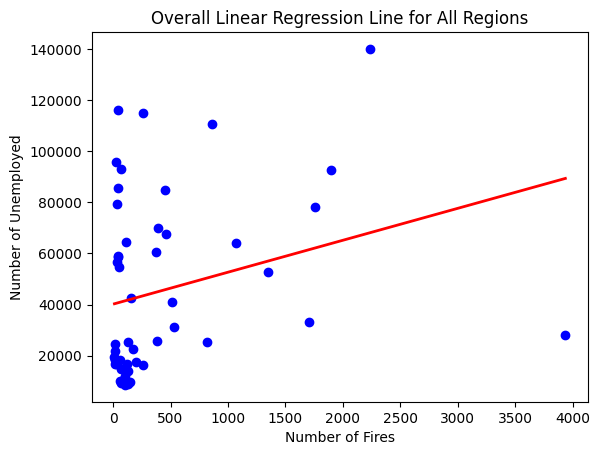

In [10]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
import numpy as np

# 假设 'df' 是你的数据框架，它已经被正确加载
# 确保列名匹配你的数据
fire_columns = ['Norte-f', 'Centro-f', 'Lisboa VT-f', 'Alentejo-f', 'Algarve-f']
unemployment_columns = ['Norte-u', 'Centro-u', 'Lisboa VT-u', 'Alentejo-u', 'Algarve-u']

# 将所有地区的火灾和失业数据收集到两个数组中
all_fire_data = df[fire_columns].values.flatten()
all_unemployment_data = df[unemployment_columns].values.flatten()

# 为这些总数据绘制散点图
plt.scatter(all_fire_data, all_unemployment_data, color='blue')

# 使用线性回归模型拟合所有地区的总数据
model = LinearRegression()
model.fit(all_fire_data.reshape(-1, 1), all_unemployment_data)

# 为回归线生成数据点
x_range = np.linspace(all_fire_data.min(), all_fire_data.max(), 100).reshape(-1, 1)
y_range = model.predict(x_range)

# 绘制回归线
plt.plot(x_range, y_range, color='red', linewidth=2)

# 添加标题和坐标轴标签
plt.title('Overall Linear Regression Line for All Regions')
plt.xlabel('Number of Fires')
plt.ylabel('Number of Unemployed')
plt.show()


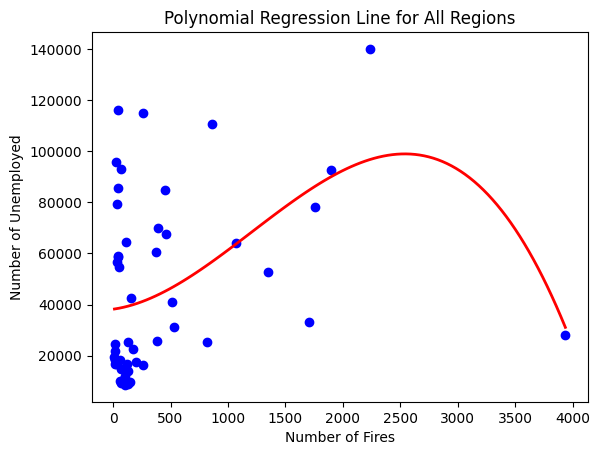

In [15]:
from sklearn.preprocessing import PolynomialFeatures
from sklearn.pipeline import make_pipeline

# 假设已经有了all_fire_data和all_unemployment_data
degree = 3  # 多项式回归的次数，可以调整

# 使用Pipeline来构建多项式特征和线性回归模型
poly_model = make_pipeline(PolynomialFeatures(degree), LinearRegression())

# 拟合模型
poly_model.fit(all_fire_data.reshape(-1, 1), all_unemployment_data)

# 生成回归线数据点
x_range = np.linspace(all_fire_data.min(), all_fire_data.max(), 100).reshape(-1, 1)
y_poly_pred = poly_model.predict(x_range)

# 绘制散点图
plt.scatter(all_fire_data, all_unemployment_data, color='blue')

# 绘制多项式回归曲线
plt.plot(x_range, y_poly_pred, color='red', linewidth=2)

# 添加标题和坐标轴标签
plt.title('Polynomial Regression Line for All Regions')
plt.xlabel('Number of Fires')
plt.ylabel('Number of Unemployed')
plt.show()

In [17]:
import pandas as pd
import statsmodels.api as sm
from statsmodels.tsa.api import VAR

# 假设你已经将数据加载到DataFrame中，并且DataFrame的名字是df
# df的列分别为'Year', 'Fire1', 'Unemployment1', 'Fire2', 'Unemployment2'等

# 转换数据，确保时间序列的正确性
df['Year'] = pd.to_datetime(df['Year'], format='%Y')
df.set_index('Year', inplace=True)

# 选择变量并构建VAR模型的输入数据
# 这里我们仅使用第一个地区的火灾数和失业数作为示例
ts_data = df[['Norte-f', 'Norte-u']]

# 检查数据是否需要差分来达到平稳性
# 例如可以用ADF test来检查

# 拟合VAR模型
model = VAR(ts_data)
results = model.fit(maxlags=2, ic='aic')  # 选择自动延迟并使用AIC信息准则选择最优延迟

# 查看模型摘要
print(results.summary())

# 进行预测
lag_order = results.k_ar
predicted_values = results.forecast(ts_data.values[-lag_order:], 5)  # 预测未来5期的值

# 转换预测值为DataFrame
pred_df = pd.DataFrame(predicted_values, index=pd.date_range(start=df.index[-1], periods=5, freq='Y'), columns=ts_data.columns)

# 查看预测结果
print(pred_df)

# 可以继续使用结果进行冲击响应分析(Impulse Response Analysis)和方差分解等进一步分析

# 注意: 由于数据量很小，VAR模型的结果可能不会很稳健。


  Summary of Regression Results   
Model:                         VAR
Method:                        OLS
Date:           Sun, 14, Apr, 2024
Time:                     22:41:51
--------------------------------------------------------------------
No. of Equations:         2.00000    BIC:                    31.0010
Nobs:                     8.00000    HQIC:                   30.2319
Log likelihood:          -136.310    FPE:                4.05830e+13
AIC:                      30.9017    Det(Omega_mle):     1.53687e+13
--------------------------------------------------------------------
Results for equation Norte-f
                coefficient       std. error           t-stat            prob
-----------------------------------------------------------------------------
const           -527.567061       570.599986           -0.925           0.355
L1.Norte-f         0.227715         0.199838            1.139           0.254
L1.Norte-u        -0.007403         0.012234           -0.605         

C:\Users\admin\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency YS-JAN will be used.
  self._init_dates(dates, freq)
C:\Users\admin\AppData\Local\Temp\ipykernel_12688\927455230.py:31: FutureWarning: 'Y' is deprecated and will be removed in a future version, please use 'YE' instead.
  pred_df = pd.DataFrame(predicted_values, index=pd.date_range(start=df.index[-1], periods=5, freq='Y'), columns=ts_data.columns)


In [21]:
import statsmodels.api as sm
from statsmodels.tsa.api import VAR

# 假设你的DataFrame df已经被正确设置，时间列已经设置为索引
model = VAR(df)
results = model.fit(maxlags=1, ic='aic')

# 预测未来的火灾数
# 假设你想预测未来5期的数据
forecast_steps = 1
forecast = results.forecast(df.values[-results.k_ar:], steps=forecast_steps)

# 将预测值转换为DataFrame
forecast_df = pd.DataFrame(forecast, index=pd.date_range(start=df.index[-1], periods=forecast_steps, freq='Y'), columns=df.columns)

# 显示预测结果
print(forecast_df)

C:\Users\admin\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency YS-JAN will be used.
  self._init_dates(dates, freq)


ValueError: maxlags is too large for the number of observations and the number of equations. The largest model cannot be estimated.

In [22]:
import pandas as pd
import statsmodels.api as sm
from statsmodels.tsa.api import VAR

# 假设你已经将数据加载到DataFrame中，并且DataFrame的名字是df
# df的列分别为'Year', 'Fire1', 'Unemployment1', 'Fire2', 'Unemployment2'等

# 转换数据，确保时间序列的正确性
df['Year'] = pd.to_datetime(df['Year'], format='%Y')
df.set_index('Year', inplace=True)

# 选择变量并构建VAR模型的输入数据
# 这里我们仅使用第一个地区的火灾数和失业数作为示例
ts_data = df[['all_fire_data', 'all_unemployment_data']]

# 检查数据是否需要差分来达到平稳性
# 例如可以用ADF test来检查

# 拟合VAR模型
model = VAR(ts_data)
results = model.fit(maxlags=2, ic='aic')  # 选择自动延迟并使用AIC信息准则选择最优延迟

# 查看模型摘要
print(results.summary())

# 进行预测
lag_order = results.k_ar
predicted_values = results.forecast(ts_data.values[-lag_order:], 5)  # 预测未来5期的值

# 转换预测值为DataFrame
pred_df = pd.DataFrame(predicted_values, index=pd.date_range(start=df.index[-1], periods=5, freq='Y'), columns=ts_data.columns)

# 查看预测结果
print(pred_df)

KeyError: 'Year'

In [24]:
import pandas as pd
from linearmodels.panel import PanelOLS

# 读取Excel文件
df = pd.read_excel("C:/all files/aba/portuglal/merged_data.xlsx")

# 初始化一个空的DataFrame来存储长格式数据
long_df = pd.DataFrame()

# 为每个地区创建长格式数据
for region in ['Norte', 'Centro', 'Lisboa VT', 'Alentejo', 'Algarve']:
    # 提取对应地区的火灾和失业数据
    region_df = df[['Year', f'{region}-f', f'{region}-u']].copy()
    region_df.columns = ['Year', 'Fires', 'Unemployment']
    region_df['Region'] = region
    # 将数据追加到长格式DataFrame
    long_df = pd.concat([long_df, region_df])

# 设置索引
long_df = long_df.set_index(['Region', 'Year'])

# 定义模型公式
mod = PanelOLS.from_formula('Unemployment ~ Fires + EntityEffects', data=long_df)

# 拟合模型
res = mod.fit()

# 输出结果
print(res)


                          PanelOLS Estimation Summary                           
Dep. Variable:           Unemployment   R-squared:                        0.0331
Estimator:                   PanelOLS   R-squared (Between):              0.0727
No. Observations:                  50   R-squared (Within):               0.0331
Date:                Sun, Apr 14 2024   R-squared (Overall):              0.0701
Time:                        23:33:14   Log-likelihood                   -550.45
Cov. Estimator:            Unadjusted                                           
                                        F-statistic:                      1.5050
Entities:                           5   P-value                           0.2264
Avg Obs:                      10.0000   Distribution:                    F(1,44)
Min Obs:                      10.0000                                           
Max Obs:                      10.0000   F-statistic (robust):             1.5050
                            